In [1]:
#1
#Find the correlation matrix.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Calculate correlation matrix
correlation_matrix = iris_df.corr()
print(correlation_matrix)



                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


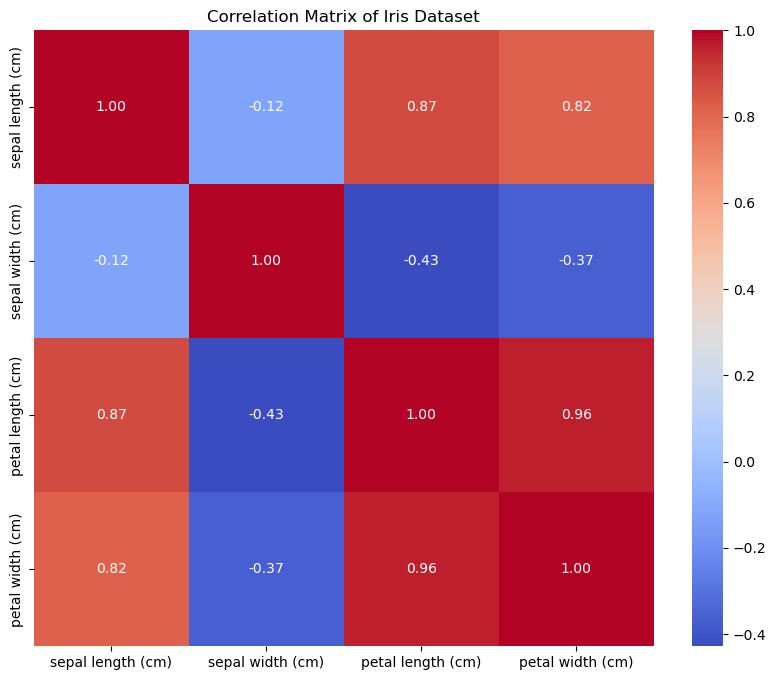

In [3]:
#2
#Plot the correlation plot on dataset and visualize giving an overview of relationships among data on iris data.
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Iris Dataset')
plt.show()


In [5]:
#3
#Analysis of covariance: variance (ANOVA), if data have categorical variables on iris data.
from scipy import stats

# Perform ANOVA
f_val, p_val = stats.f_oneway(iris_df['sepal length (cm)'], 
                               iris_df['sepal width (cm)'], 
                               iris_df['petal length (cm)'], 
                               iris_df['petal width (cm)'])
print(f"ANOVA F-value: {f_val}, P-value: {p_val}")


ANOVA F-value: 482.91531656927964, P-value: 4.660592480454751e-159


In [7]:
#4
#Apply linear regression Model techniques to predict the data on any dataset.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare data
X = iris_df[['sepal length (cm)', 'sepal width (cm)']]
y = iris_df['petal length (cm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
predictions = linear_model.predict(X_test)
print(predictions)


[4.58833234 2.5445039  7.66585249 4.27860392 5.817364   2.5543859
 3.57630012 5.59048256 5.56882307 4.19575695 4.75402629 2.03754004
 2.59580938 2.07896353 1.49104819 4.26872192 5.02233122 4.11290997
 3.88602853 5.11506019 1.59365916 4.32002741 1.85208209 5.11506019
 6.40717483 5.37348312 6.04424544 5.28075415 2.03754004 1.90338758]


In [9]:
#5
#Apply logical regression Model techniques to predict the data on any dataset.
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Prepare data
iris_df['target'] = LabelEncoder().fit_transform(iris.target)
X = iris_df[['sepal length (cm)', 'sepal width (cm)']]
y = iris_df['target']

# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# Predictions
logistic_predictions = logistic_model.predict(X)
print(logistic_predictions)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [36]:
#6
#Clustering algorithms for unsupervised classification.
from sklearn.cluster import KMeans

# KMeans Clustering
kmeans = KMeans(n_clusters=3)
iris_df['Cluster'] = kmeans.fit_predict(iris_df[['sepal length (cm)', 'sepal width (cm)']])


C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
#7
#Association algorithms for supervised classification on any dataset
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load Wine dataset
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Prepare data
X = wine_df.drop('target', axis=1)  # Features
y = wine_df['target']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X, y)


Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



DecisionTreeClassifier()

Confusion Matrix:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



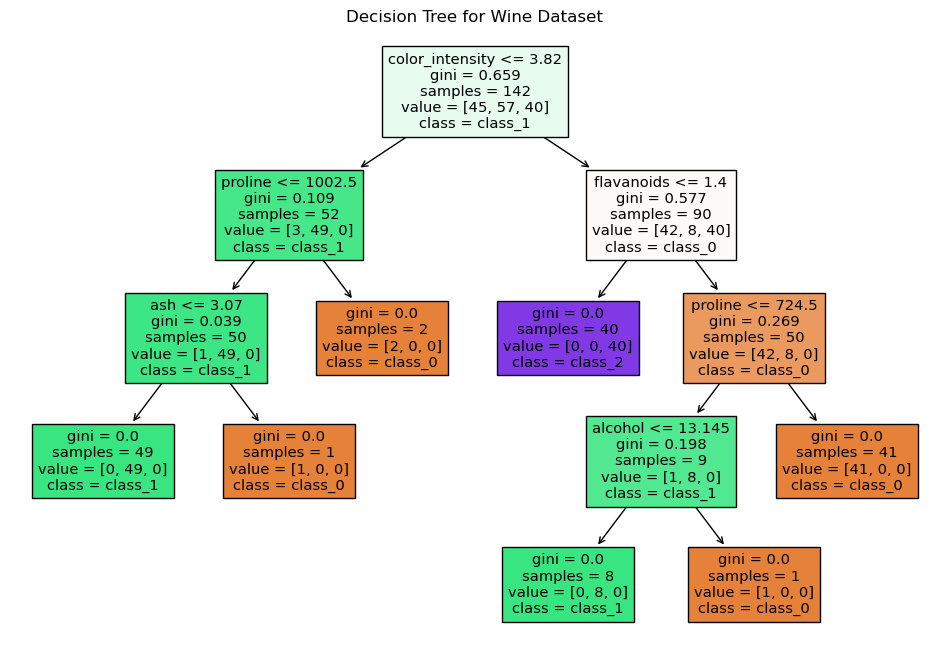

In [15]:
#8
#Developing and implementing Decision Tree model on the dataset
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Load Wine dataset
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Prepare features and target variable
X = wine_df.drop('target', axis=1)  # Features
y = wine_df['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=wine.target_names)
plt.title("Decision Tree for Wine Dataset")
plt.show()


In [17]:
#9
#Bayesian classification on any dataset.
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Prepare features and target variable
X = iris_df.drop('target', axis=1)  # Features
y = iris_df['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes Classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
#10
#SVM classification on any dataset
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Prepare features and target variable
X = iris_df.drop('target', axis=1)  # Features
y = iris_df['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
#11
#Text Mining algorithms on unstructured dataset
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Create a DataFrame
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})

# Display the first few rows of the DataFrame
print(df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data, transform the test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


                                                text  target
0  \n\nI am sure some bashers of Pens fans are pr...      10
1  My brother is in the market for a high-perform...       3
2  \n\n\n\n\tFinally you said what you dream abou...      17
3  \nThink!\n\nIt's the SCSI card doing the DMA t...       3
4  1)    I have an old Jasmine drive which I cann...       4
Confusion Matrix:
[[ 42   0   1   1   0   0   0   1   4   1   2   6   0   2   3  68   5  13
    1   1]
 [  1 138  14  15   0   6   4   1   7   0   1   6   0   0   4   4   0   1
    0   0]
 [  1  14 129  26   3   7   0   0  10   0   0   3   1   0   0   1   0   0
    0   0]
 [  0   6  16 142   6   1   3   1   1   0   0   1   3   2   0   1   0   0
    0   0]
 [  0   2   8  24 138   0   5   1  12   0   0   7   2   0   3   2   1   0
    0   0]
 [  0  15  11   3   1 174   1   1   3   0   2   0   0   0   2   2   0   0
    0   0]
 [  0   3   1  26   5   1 135   3   3   0   1   6   2   1   4   1   1   0
    0   0]
 [  0   1   0   1   1

C:\Users\rishi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


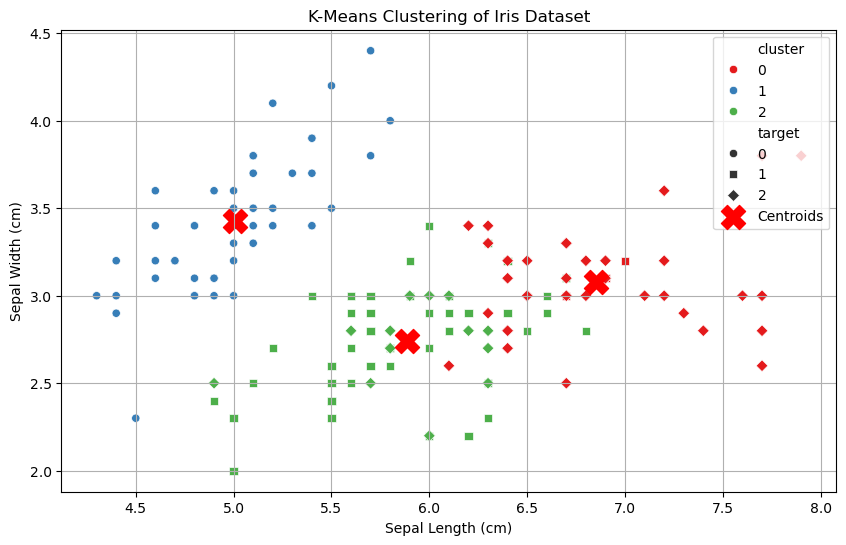

In [22]:
#12
#Plot the cluster data using python visualizations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Define the number of clusters
num_clusters = 3

# Create a KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the data
iris_df['cluster'] = kmeans.fit_predict(iris_df[iris.feature_names])

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster', 
                palette='Set1', style='target', markers=["o", "s", "D"])

# Add centroids to the plot
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

# Add titles and labels
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()
plt.show()


In [42]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/390.3 MB 2.0 MB/s eta 0:03:19
   ---------------------------------------- 0.3/390.3 MB 2.3 MB/s eta 0:02:53
   ---------------------------------------- 0.3/390.3 MB 2.3 MB/s eta 0:02:54
   ---------------------------------------- 0.3/390.3 MB 2.3 MB/s eta 0:02:54
   ---------------------------------------- 0.4/390.3 MB 1.3 MB/s eta 0:04:58
   ---------------------------------------- 0.4/390.3 MB 1.3 MB/s eta 0:05:06
   ---------------------------------------- 0.4/390.3 MB 1.3 MB/s eta 0:05:12
   ---------------------------------------- 0.5/390.3 MB 1.2 MB/s eta 0:05:29
   ---------------------------------------- 0.5/390.3 MB 1.2 MB/s eta 0:05:29
   --------

Epoch 1/100


C:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3838 - loss: 1.7848 - val_accuracy: 0.2917 - val_loss: 1.5009
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3950 - loss: 1.1853 - val_accuracy: 0.2917 - val_loss: 1.0564
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4014 - loss: 0.9400 - val_accuracy: 0.2917 - val_loss: 0.8772
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5024 - loss: 0.8475 - val_accuracy: 0.5000 - val_loss: 0.8123
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7483 - loss: 0.7807 - val_accuracy: 0.8750 - val_loss: 0.7474
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9449 - loss: 0.7472 - val_accuracy: 0.9583 - val_loss: 0.7122
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8401 - loss: 0.7000 - val_accuracy: 0.8333 - val_loss: 0.6999
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9252 - loss: 0.6634 - val_accuracy: 1.0000 - val_loss: 0.

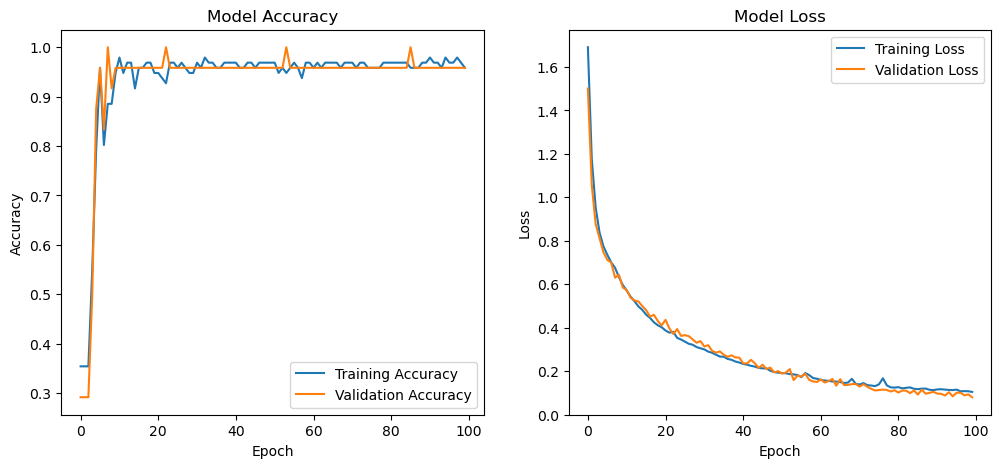

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [51]:
#13
#Creating & Visualizing Neural Network for the given data. (Use python)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)  # Updated line
y_onehot = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Create a Sequential model
model = Sequential()
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer
model.add(Dense(10, activation='relu'))  # Hidden layer
model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=5, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize the model architecture
plot_model(model, show_shapes=True, show_layer_names=True)



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10


C:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8641 - loss: 0.4737 - val_accuracy: 0.9621 - val_loss: 0.1355
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9649 - loss: 0.1142 - val_accuracy: 0.9670 - val_loss: 0.1077
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9781 - loss: 0.0712 - val_accuracy: 0.9691 - val_loss: 0.1052
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9834 - loss: 0.0531 - val_accuracy: 0.9722 - val_loss: 0.0949
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9873 - loss: 0.0409 - val_accuracy: 0.9710 - val_loss: 0.1048
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9906 - loss: 0.0314 - val_accuracy: 0.9736 - val_loss: 0.1004
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9758 - val_loss: 0.1033
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9924 - loss: 0.0224 - val_accurac

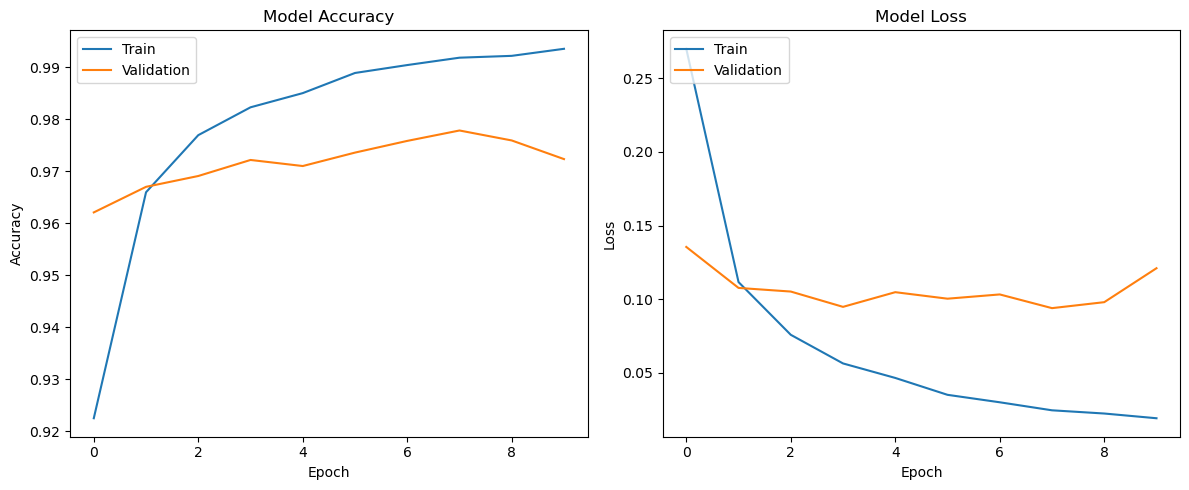

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


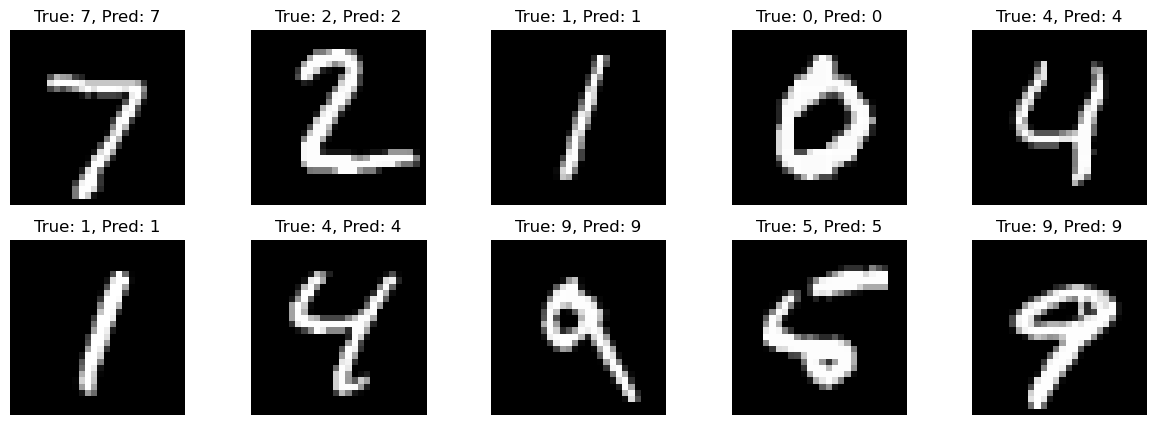

In [53]:
#14
#Recognize optical character using ANN.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create a Sequential model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the input (28x28 images) to a 1D array (784)
model.add(Dense(128, activation='relu'))  # Hidden layer
model.add(Dense(64, activation='relu'))   # Hidden layer
model.add(Dense(10, activation='softmax')) # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Make predictions on the test set
predictions = model.predict(X_test)

# Function to visualize predictions
def visualize_predictions(X, y_true, y_pred, num_images=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i], cmap='gray')
        plt.title(f'True: {np.argmax(y_true[i])}, Pred: {np.argmax(y_pred[i])}')
        plt.axis('off')
    plt.show()

# Visualize the first 10 predictions
visualize_predictions(X_test, y_test, predictions)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 354s 2us/step


C:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2581 - loss: 1.9662 - val_accuracy: 0.4509 - val_loss: 1.4776
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4717 - loss: 1.4568 - val_accuracy: 0.5409 - val_loss: 1.2850
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5323 - loss: 1.2955 - val_accuracy: 0.5941 - val_loss: 1.1334
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5888 - loss: 1.1561 - val_accuracy: 0.6330 - val_loss: 1.0441
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6199 - loss: 1.0842 - val_accuracy: 0.6461 - val_loss: 1.0085
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6497 - loss: 1.0030 - val_accuracy: 0.6690 - val_loss: 0.9540
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6765 - loss: 0.9235 - val_accuracy: 0.6688 - val_loss: 0.9341
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6965 - loss: 0.8738 - va

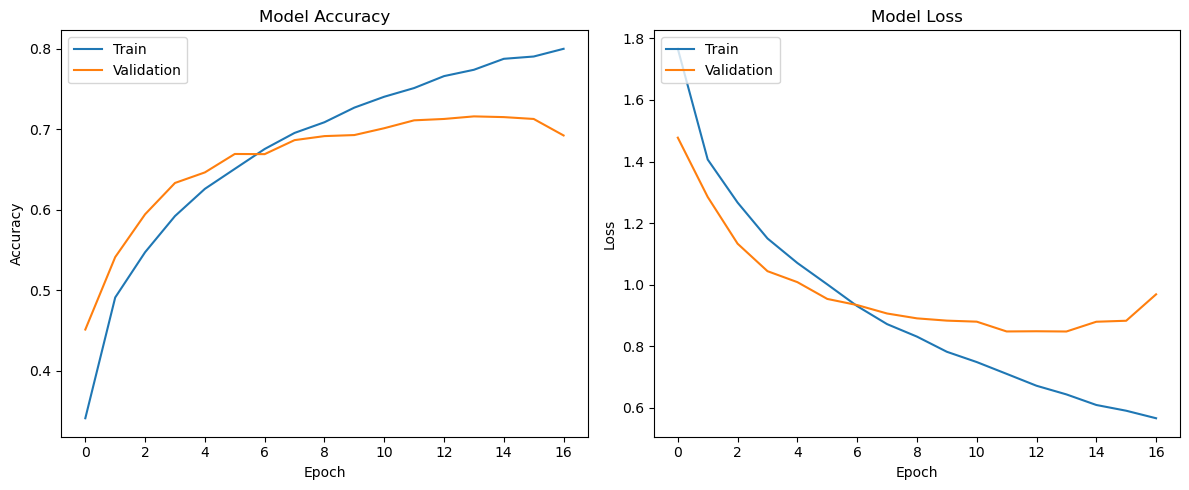

In [54]:
#15
#Write a program to implement CNN
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the images to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(10, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [59]:
#16
#Write a program to implement RNN
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

# Sample text data
text = "hello world this is a simple example of rnn implementation"

# Create a set of unique characters
chars = sorted(list(set(text)))
char_to_index = {ch: i for i, ch in enumerate(chars)}
index_to_char = {i: ch for i, ch in enumerate(chars)}

# Prepare the input and output sequences
maxlen = 5  # Length of the input sequences
step = 1    # Step size
sentences = []
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

# Vectorization using integer encoding
X = np.zeros((len(sentences), maxlen), dtype=int)
y = np.zeros((len(sentences), len(chars)), dtype=int)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t] = char_to_index[char]  # Use integer encoding for input
    y[i, char_to_index[next_chars[i]]] = 1  # One-hot encode the output

# Create a Sequential model
model = Sequential()

# Add an Embedding layer (length of unique characters, embedding size, input length)
model.add(Embedding(input_dim=len(chars), output_dim=10, input_length=maxlen))

# Add a Simple RNN layer
model.add(SimpleRNN(128, activation='relu'))

# Add an output layer with softmax activation for multi-class classification
model.add(Dense(len(chars), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, batch_size=8, epochs=50)

# Function to generate text
def generate_text(seed, length=50):
    generated = seed
    for _ in range(length):
        x_pred = np.zeros((1, maxlen), dtype=int)
        for t, char in enumerate(seed):
            if char in char_to_index:
                x_pred[0, t] = char_to_index[char]
        
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(preds)
        next_char = index_to_char[next_index]
        
        generated += next_char
        seed = seed[1:] + next_char  # Update seed by removing the first character and adding the new one

    return generated

# Generate text using the RNN model
seed_text = "hello"
generated_text = generate_text(seed_text)
print("Generated text:", generated_text)



Epoch 1/50


C:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0073 - loss: 2.8347    
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2353 - loss: 2.8135
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4149 - loss: 2.7912 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3901 - loss: 2.7556
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2674 - loss: 2.7054
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2949 - loss: 2.5977
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2079 - loss: 2.5203
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2347 - loss: 2.3739
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3169 - loss: 2.2871
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3401 - loss: 2.1608 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3338 - loss: 2.0143
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4990 - loss: 1.7256
Epoch 13/50
7/7 ━━

In [62]:
#17
#Write a program to implement GAN
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Load the MNIST dataset
(X_train, _), (_, _) = mnist.load_data()

# Normalize the images to the range [-1, 1]
X_train = X_train.astype(np.float32) / 255.0
X_train = (X_train - 0.5) * 2.0  # Scale to [-1, 1]

# Reshape the data to fit the model
X_train = np.expand_dims(X_train, axis=-1)

# Define the dimension of the noise vector
z_dim = 100

# Generator Model
def build_generator(z_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Discriminator Model
def build_discriminator(img_shape):
    model = Sequential()
    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Initialize the models
generator = build_generator(z_dim)
discriminator = build_discriminator((28, 28, 1))

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build and compile the GAN model
discriminator.trainable = False
z = tf.keras.Input(shape=(z_dim,))
img = generator(z)
validity = discriminator(img)
gan = Model(z, validity)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training function
def train_gan(epochs, batch_size=128):
    generated_images = []

    for epoch in range(epochs):
        # Sample a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_images = X_train[idx]

        # Generate a batch of fake images
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        fake_images = generator.predict(noise)

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, z_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print the progress
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]:.4f}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}]")
        
        # Save generated images at certain intervals
        if epoch % 1000 == 0:
            generated_images.append(fake_images)

    return generated_images

# Train the GAN
generated_images = train_gan(epochs=5000, batch_size=128)

# Visualize the generated images
plt.figure(figsize=(10, 10))
for i, img_set in enumerate(generated_images):
    # Pick the first image from the set of generated images
    plt.subplot(1, len(generated_images), i + 1)
    plt.imshow(img_set[0, :, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


C:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
C:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


AttributeError: 'NoneType' object has no attribute 'update_state'

In [68]:
pip install beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


In [73]:
#18
#Web scraping experiments (by using tools)

#Beautiful Soup (Python)

import requests
from bs4 import BeautifulSoup

# URL to scrape
url = 'https://example.com'

# Make a request to the website
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find all headings (h1, h2, etc.)
headings = soup.find_all(['h1', 'h2', 'h3'])

for heading in headings:
    print(heading.text)





Example Domain


In [74]:
pip install selenium

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.7 MB 357.2 kB/s eta 0:00:27
    --------------------------------------- 0.1/9.7 MB 532.5 kB/s eta 0:00:18
    --------------------------------------- 0.2/9.7 MB 655.1 kB/s eta 0:00:15
   - -------------------------------------- 0.3/9.7 MB 850.6 kB/s eta 0:00:12
   - -------------------------------------- 0.3/9.7 MB 850.6 kB/s eta 0:00:12
   - -------------------------------------- 0.3/9.7 MB 850.6 kB/s eta 0:00:12
   - -------------------------------------- 0.3/9.7 MB 698.7 kB/s eta 0:00:14
   - -----------------------------------

In [76]:
#Selenium
from selenium import webdriver
from selenium.webdriver.common.by import By

# Set up the WebDriver (e.g., Chrome)
driver = webdriver.Chrome()

# Open a webpage
driver.get('https://example.com')

# Extract data
headings = driver.find_elements(By.TAG_NAME, 'h1')

for heading in headings:
    print(heading.text)

# Close the driver
driver.quit()



Example Domain


In [77]:
npm install puppeteer

SyntaxError: invalid syntax (3127857321.py, line 1)

In [ ]:
#Puppeteer (Node.js)

const puppeteer = require('puppeteer');

(async () => {
    const browser = await puppeteer.launch();
    const page = await browser.newPage();
    await page.goto('https://example.com');

    // Extract data
    const headings = await page.evaluate(() => {
        return Array.from(document.querySelectorAll('h1, h2, h3')).map(h => h.innerText);
    });

    console.log(headings);

    await browser.close();
})();